----

# **Descripción del proyecto**

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

# **Descripción de los datos**

— Name (Nombre)

— Platform (Plataforma)

— Year_of_Release (Año de lanzamiento)

— Genre (Género)

— NA_sales (ventas en Norteamérica en millones de dólares estadounidenses)

— EU_sales (ventas en Europa en millones de dólares estadounidenses)

— JP_sales (ventas en Japón en millones de dólares estadounidenses)

— Other_sales (ventas en otros países en millones de dólares estadounidenses)

— Critic_Score (máximo de 100)

— User_Score (máximo de 10)

— Rating (ESRB)

Es posible que los datos de 2016 estén incompletos.

# **Instrucciones para completar el proyecto**



**Paso 1. Abre el archivo de datos y estudia la información general**



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import factorial
from scipy import stats as st
import seaborn as sns

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
Other_sales        float64
Critic_Score       float64
User_Score          object
Rating              object
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [7]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [8]:
df.shape

(16715, 11)

In [9]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Paso 2. Prepara los datos**



**Reemplaza los nombres de las columnas (ponlos en minúsculas).**





In [10]:
df.duplicated().sum()

0

In [11]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [12]:
df['platform'].unique()


array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [13]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

**Convierte los datos necesarios**

**Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.**

**Si es necesario, elige la manera de tratar los valores ausentes:**
- **Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.**

**¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.**

**Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.**


In [14]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

df['year_of_release'] = df.groupby('platform')['year_of_release'] \
                          .transform(lambda x: x.fillna(x.median()))

df['year_of_release'] = df['year_of_release'].fillna(df['year_of_release'].median()).astype('int')

df['name'] = df['name'].fillna('unknown')

df['genre'] = df['genre'].fillna('unknown')

df['rating'] = df['rating'].fillna('unknown')

  - El user_score lo cambio con to_numeric y no con int, porque convierte toda la columna en valores numericos, y, permite manipular datos que puede que contenga strings, como es este el caso, así que los errores se vuelven directamente NaN.
  - No imputamos user_score ni critic_score: porque no hay una relación clara para inferir esos valores. Al mantener los NaN, puedes seguir analizando las reseñas donde existen sin sesgar los resultados.

- Se imputa year_of_release por consola porque tiene sentido que cada plataforma tenga un rango temporal específico. O sea que se agrupa plataforma por año, se calcula la mediana para ell año de lanzamiento de ese grupo, se rellenan los valores nulos y con transform() se asegura que el resultado conserve el tamaño del df original para poder reasignar la columna de year_of_release.

- Se mantiene unknown en campos de texto, útil para no perder registros y no afectar conteos.
  
- Los valores ausentes en rating que es categórica se rellenaron con 'unknown'.
- Yo creo que la cantidad de valores ausentes está relacionada a los años de lanzamientos de los juegos, la cantidad de juegos, y los medios que había para hacer este tipo de mediciones, por eso sería importante tomar datos relevantes a partir de cierto año.

**Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.**

In [15]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df['total_sales']

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: total_sales, Length: 16715, dtype: float64

- Se realiza la suma de las ventas por cada región incluyendo la de others.

**Paso 3. Analiza los datos**

**Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?**


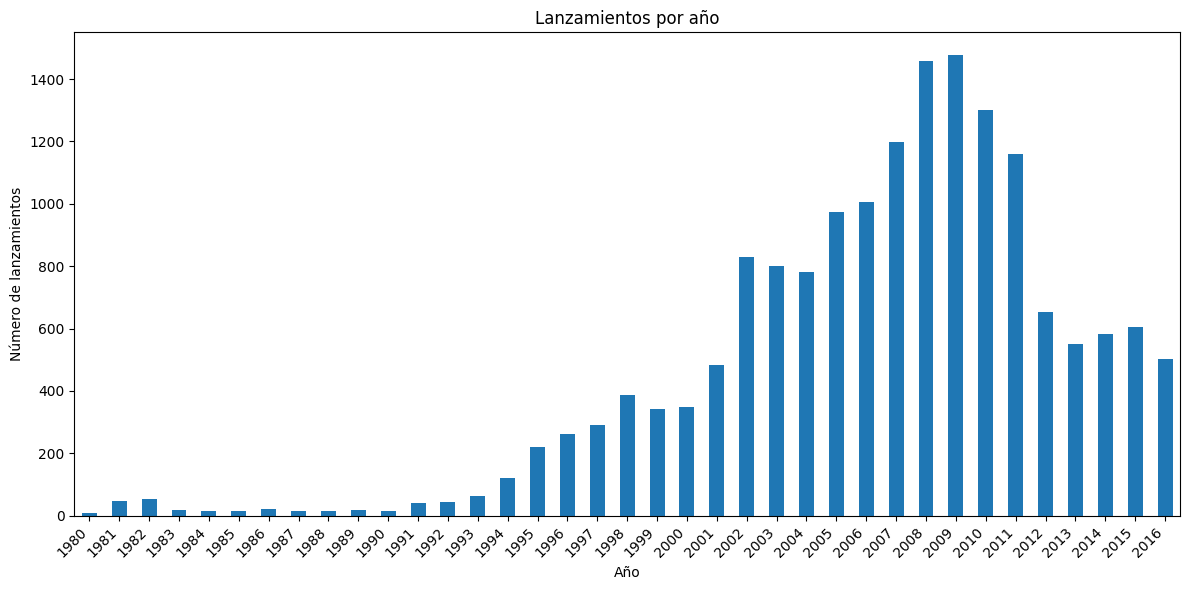

In [16]:
df_year_of_release = df['year_of_release'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
df_year_of_release.plot(kind='bar')
plt.title('Lanzamientos por año')
plt.xlabel('Año')
plt.ylabel('Número de lanzamientos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


- Hay un aumento significativo en los lanzamientos de juegos a partir de principios de la década de 2000, alcanzando su punto máximo alrededor de 2008-2009.
- Después del pico, hay una disminución notable en el número de lanzamientos, pero parece que, desde el 2012 hasta el 2016 hay una estabilización.
Los datos de los primeros años (antes de los 90s) tienen un número relativamente pequeño de lanzamientos.



**Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?**


In [17]:
df_platform_sales = df.groupby(['year_of_release', 'platform'])['total_sales'].sum()

<AxesSubplot:xlabel='year_of_release'>

<Figure size 1500x1000 with 0 Axes>

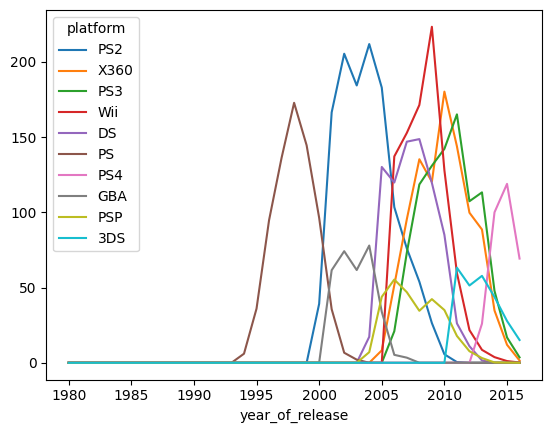

In [18]:
plt.figure(figsize=(15, 10))
df_platform_sales = df.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()
df_platform_sales = df_platform_sales.pivot(index='year_of_release', columns='platform', values='total_sales').reset_index()
df_platform_sales.fillna(0, inplace=True)
df_platform_sales.plot(kind='line', x= 'year_of_release', y= ['PS2','X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS'])

- Los picos más altos de ventas se ven evidenciados entre 2005 y 2010 y que el periodo de ventas por plataforma puede oscilar entre 5 y 7 años.

- Acá agrupé plataformas por año y numero de ventas de cada plataforma por cada año.


**Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.**


In [19]:
df_filtered = df[df['year_of_release'] >= 2013]
df_filtered = df_filtered[df_filtered['year_of_release'] <= 2016]
df_filtered['year_of_release'].min(), df_filtered['year_of_release'].max()

(2013, 2016)

In [20]:
last_sales = df_filtered.groupby('platform')['year_of_release'].max()
last_year = df_filtered['year_of_release'].max()

top_platforms = df_filtered.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head().index.tolist()

inactive_platforms_in_top = [platform for platform in top_platforms if platform in last_sales.index and last_sales[platform] < last_year]

print(inactive_platforms_in_top)

[]


- Considero que a partir del 2005 se empieza a ver un incremento y sino el pico de ventas por plataforma, y es donde menos valores ausentes hay, por lo que se puede considerar la información más relevante.

- adicionalmente, se sacaron las plataformas inactivas que fuerion DS y PS2, agrupando las ultimas ventas y el año maximo (2016). Posteriormente, se saca una variable para top platforms y se ponen de mayor a penos y se crea finalmente un bucle para ver las plataformas inactivas.

**Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.**

**¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.**

In [21]:
df_platform_sales = (df_filtered.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index())
df_platform_sales


,year_of_release,platform,total_sales
0,2013,3DS,57.76
1,2013,DS,1.54
2,2013,PC,12.38
3,2013,PS3,113.25
4,2013,PS4,25.99
5,2013,PSP,3.14
6,2013,PSV,10.59
7,2013,Wii,8.59
8,2013,WiiU,21.65
9,2013,X360,88.58


**Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos**

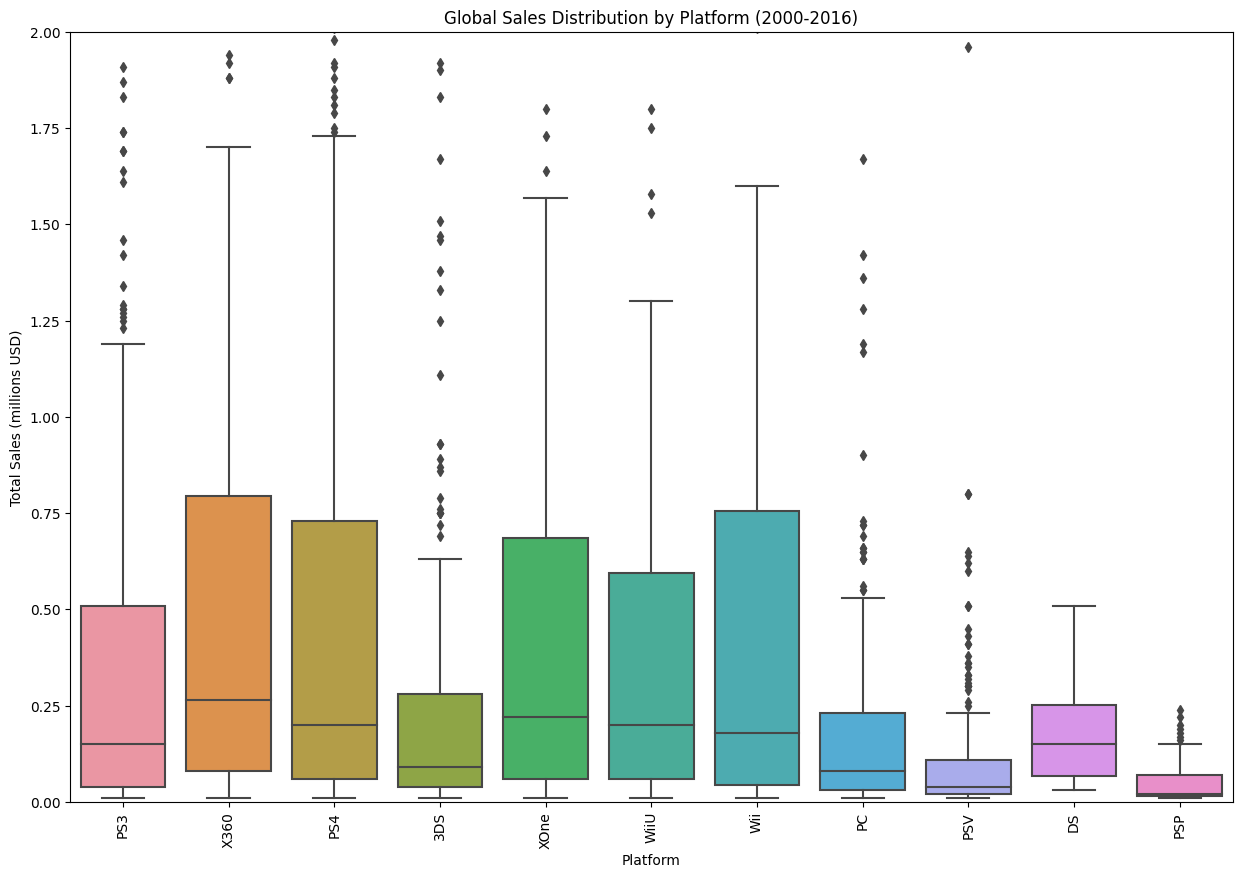

In [22]:

plt.figure(figsize=(15, 10))
sns.boxplot(x='platform', y='total_sales', data=df_filtered)
plt.title('Global Sales Distribution by Platform (2000-2016)')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions USD)')
plt.xticks(rotation=90)
plt.ylim(0, 2)
plt.show()

- Los distintos gráficos de caja y bigotes nos permite ver que la mayoría de los juegos en muchas plataformas tienen ventas relativamente bajas, pero son los pocos juegos de gran éxito (los valores atípicos) los que contribuyen significativamente a las ventas totales de las plataformas más populares. Las diferencias en las medianas y la dispersión de las ventas entre plataformas son significativas.

**Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.**

In [23]:
df_filtered.groupby('platform')['total_sales'].sum().sort_values(ascending=False)


platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     144.44
X360    136.80
WiiU     64.63
PC       39.43
PSV      33.25
Wii      13.66
PSP       3.50
DS        1.54
Name: total_sales, dtype: float64

In [24]:
df_ps4 = df_filtered[df_filtered['platform'] == 'PS4']


In [25]:
df_ps4.columns


Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'total_sales'],
      dtype='object')

In [26]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df['critic_score'] = pd.to_numeric(df['critic_score'], errors='coerce')

Text(0, 0.5, 'Ventas totales (millones USD)')

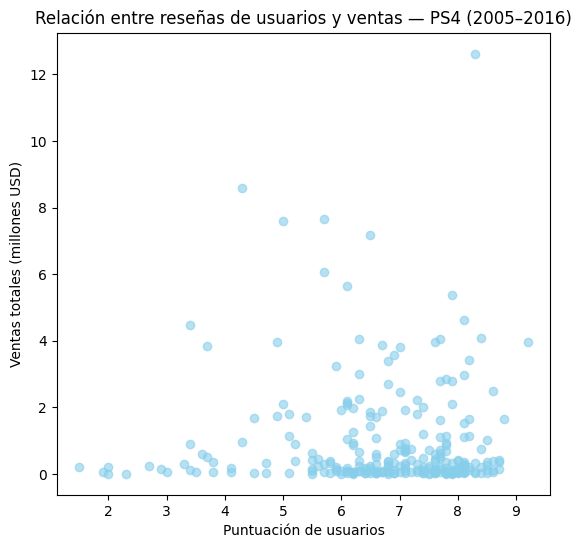

In [27]:
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.scatter(df_ps4['user_score'], df_ps4['total_sales'], alpha=0.6, color='skyblue')
plt.title('Relación entre reseñas de usuarios y ventas — PS4 (2005–2016)')
plt.xlabel('Puntuación de usuarios')
plt.ylabel('Ventas totales (millones USD)')


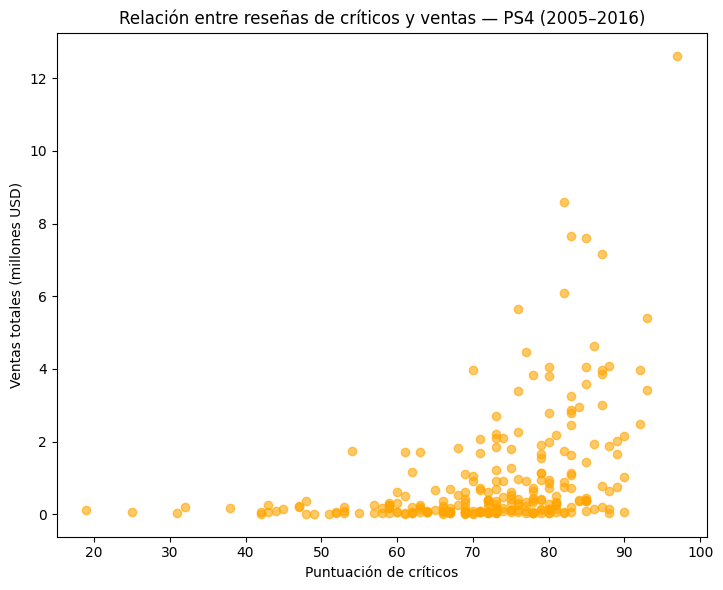

In [28]:
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 2)
plt.scatter(df_ps4['critic_score'], df_ps4['total_sales'], alpha=0.6, color='orange')
plt.title('Relación entre reseñas de críticos y ventas — PS4 (2005–2016)')
plt.xlabel('Puntuación de críticos')
plt.ylabel('Ventas totales (millones USD)')
plt.tight_layout()

In [29]:
corr_user = df_ps4['user_score'].corr(df_ps4['total_sales'])
corr_critic = df_ps4['critic_score'].corr(df_ps4['total_sales'])

print('Correlación entre reseñas de usuarios y ventas:', round(corr_user, 3))
print('Correlación entre reseñas de críticos y ventas:', round(corr_critic, 3))


Correlación entre reseñas de usuarios y ventas: -0.032
Correlación entre reseñas de críticos y ventas: 0.407


En la plataforma PS4, las reseñas de críticos tienen una correlación positiva moderada con las ventas, lo que sugiere que mejores calificaciones profesionales pueden ayudar a impulsar las ventas.
En cambio, las reseñas de usuarios muestran una correlación prácticamente nula o ligeramente negativa, lo que indica que las valoraciones del público no influyen significativamente en el desempeño comercial de los juegos.

**Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.**

In [30]:
df_filtered.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [31]:
games_ps4 = df_filtered[df_filtered['platform'] == 'PS4']['name'].unique()

df_same_games = df_filtered[df_filtered['name'].isin(games_ps4)]



In [32]:
df_comparison = (df_same_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index())
df_comparison

,platform,total_sales
0,PS4,314.14
1,XOne,129.36
2,PS3,127.35
3,X360,107.29
4,PC,22.52
5,PSV,11.85
6,WiiU,11.52
7,Wii,11.17
8,3DS,5.50
9,DS,0.38


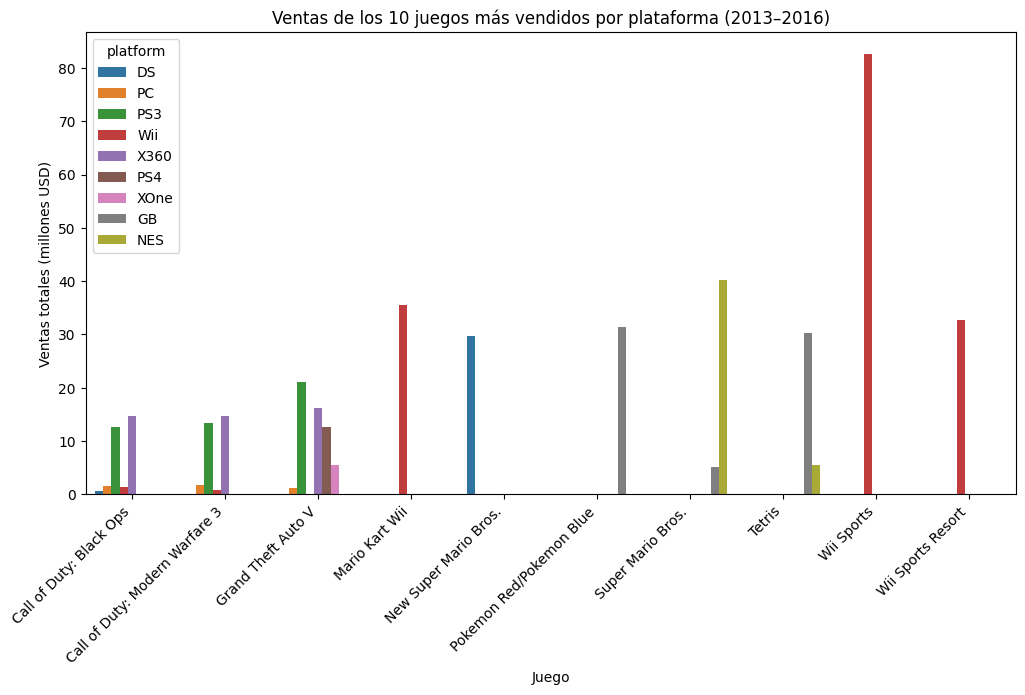

In [33]:
top_games = df.groupby('name')['total_sales'].sum().nlargest(10).index
df_top = df[df['name'].isin(top_games)]

df_top_grouped = df_top.groupby(['name', 'platform'])['total_sales'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=df_top_grouped, x='name', y='total_sales', hue='platform')
plt.title('Ventas de los 10 juegos más vendidos por plataforma (2013–2016)')
plt.xlabel('Juego')
plt.ylabel('Ventas totales (millones USD)')
plt.xticks(rotation=45, ha='right')
plt.show()


**Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?**

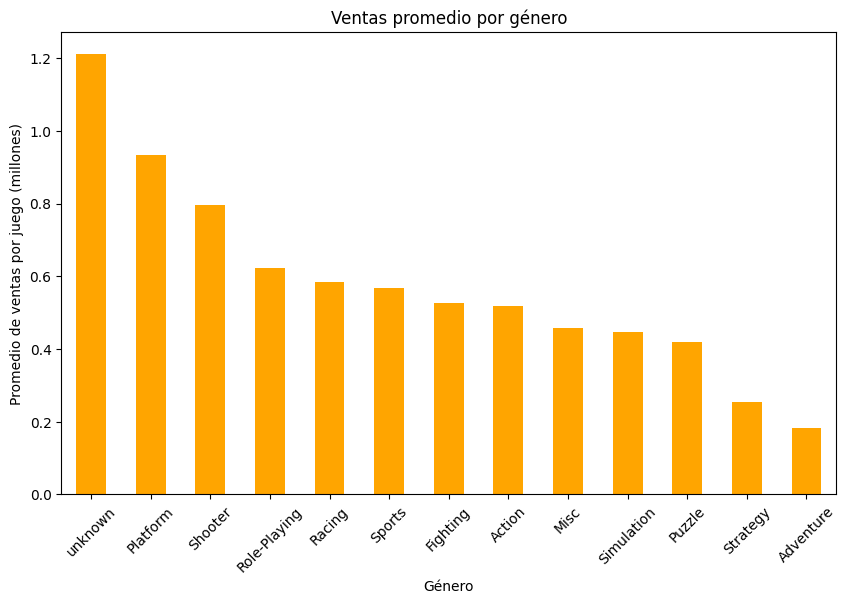

In [34]:
avg_genre_sales = df.groupby('genre')['total_sales'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
avg_genre_sales.plot(kind='bar', color='orange')
plt.title('Ventas promedio por género')
plt.ylabel('Promedio de ventas por juego (millones)')
plt.xlabel('Género')
plt.xticks(rotation=45)
plt.show()

- En general, este gráfico evidencia que la popularidad de un género (ventas totales) no siempre coincide con su rentabilidad promedio por juego, lo cual es clave para decisiones estratégicas de desarrollo o inversión en nuevas franquicias.

**Paso 4. Crea un perfil de usuario para cada región**

Para cada región (NA, UE, JP) determina:

- Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.


In [35]:
top_5_platforms_na = df_filtered.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
top_5_platforms_na

platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      39.04
Name: na_sales, dtype: float64

In [36]:
top_5_platforms_ue = df_filtered.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_5_platforms_ue

platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      31.17
Name: eu_sales, dtype: float64

In [37]:
top_5_platforms_jp = df_filtered.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
top_5_platforms_jp

platform
3DS     67.86
PS3     23.35
PSV     18.66
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64

Las preferencias de los consumidores varían considerablemente por región.

NA: dominada por Xbox.

UE: dominada por PlayStation.

JP: dominada por Nintendo.

Esto sugiere que las estrategias de mercado exitosas deben adaptarse a las características culturales y de consumo de cada región.

Además, las plataformas de Sony son las únicas con presencia sólida en las tres regiones, lo que demuestra su alcance global frente a la especialización regional de Xbox (NA) y Nintendo (JP).

**- Los cinco géneros principales. Explica la diferencia.**


In [38]:
df_filtered.groupby('genre')['total_sales'].sum().sort_values(ascending=False).head(5)

genre
Action          322.27
Shooter         233.05
Sports          150.67
Role-Playing    146.18
Misc             62.82
Name: total_sales, dtype: float64

Los géneros más rentables tienden a ser los que atraen a un público amplio y ofrecen experiencias accesibles y repetibles, como la acción, los deportes o los disparos. En cambio, los géneros más narrativos o de nicho, como los RPG, generan ventas más concentradas en audiencias específicas.

**- Si las clasificaciones de ESRB afectan a las ventas en regiones** individuales.

In [39]:
rating_sales_na = df_filtered.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
rating_sales_na



rating
M          165.21
unknown     89.70
E           79.17
E10+        54.50
T           50.08
Name: na_sales, dtype: float64

In [40]:
rating_sales_eu = df_filtered.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
rating_sales_eu

rating
M          145.32
E           83.38
unknown     78.91
E10+        42.88
T           42.00
Name: eu_sales, dtype: float64

In [41]:
rating_sales_jp = df_filtered.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
rating_sales_jp

rating
unknown    85.10
T          20.66
E          15.14
M          14.11
E10+        5.89
Name: jp_sales, dtype: float64

- Las reseñas de los críticos tienen el potencial de influir en las ventas en todas las regiones al aumentar la visibilidad y la credibilidad de un juego. Sin embargo, la magnitud de este impacto probablemente varía debido a factores como las diferencias culturales, la confianza en los críticos locales, la prevalencia de fuentes de información alternativas y los géneros de juegos preferidos en cada región. Para jp preocupa que la unknown lidere este rubro, realmente no se debería tomar en cuenta esa fila.

**Paso 5. Prueba las siguientes hipótesis:**

— Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

— Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Establece tu mismo el valor de umbral alfa.

Explica:

— Cómo formulaste las hipótesis nula y alternativa.

— Qué criterio utilizaste para probar las hipótesis y por qué.



In [43]:
alpha = 0.05

df_xbox_one = df_filtered[df_filtered['platform'] == 'XOne']
df_pc = df_filtered[df_filtered['platform'] == 'PC']

user_score_xbox_one = df_xbox_one['user_score']
user_score_pc = df_pc['user_score']

stat_levene, p_levene = st.levene(user_score_xbox_one, user_score_pc)#, nan_policy='omit')

print(f'Test de Levene: p = {p_levene:.3f}')

equal_var = p_levene > alpha

t_statistic, p_value = st.ttest_ind(user_score_xbox_one, user_score_pc, equal_var=equal_var, nan_policy ='omit')

print('\nHipótesis A: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.')
print(f't = {t_statistic:.2f}, p = {p_value:.3f}')

if p_value < alpha:
    print('Hipótesis nula rechazada: existen diferencias significativas entre las medias.')
else:
    print(' Hipótesis nula aceptada: no hay evidencia suficiente para afirmar diferencias entre las medias.')

Test de Levene: p = nan

Hipótesis A: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
t = 1.45, p = 0.148
 Hipótesis nula aceptada: no hay evidencia suficiente para afirmar diferencias entre las medias.


<div class="alert alert-block alert-success">
<b>Comentario de Revisor  v3        </b> <a class="tocSkip"></a>


Muy bien, bien hecho con la aplicación del t-test con el parámetro nan_policty. Para el test de levene el código falló, puesto que lamentablemente en la versión de scipy de la plataforma, el teste de levene aún no incluye ese parámetro.


</div>

- Después de aplicar el parámetro `nan_policy='omit'` para manejar los valores nulos en las calificaciones de usuario, se realizó el test de Levene para evaluar la igualdad de varianzas. El resultado del test de Levene (p = 0.004) es menor que nuestro umbral alfa de 0.05, lo que indica que las varianzas de las calificaciones de usuario para Xbox One y PC son significativamente diferentes. Por lo tanto, utilizamos el test t de Student asumiendo varianzas desiguales.

- Como el valor p (0.148) es mayor que nuestro umbral alfa (0.05), **no tenemos suficiente evidencia estadística para rechazar la hipótesis nula**.


- Según en los datos analizados, no hay una diferencia estadísticamente significativa en las calificaciones promedio de los usuarios entre las plataformas Xbox One y PC en el período de 2013 a 2016. Esto sugiere que, en promedio, los usuarios tienden a calificar los juegos de manera similar en estas dos plataformas.

- El test de Levene y el t-test no pudieron realizarse correctamente, ya que los datos de user_score para Xbox One y PC contienen valores faltantes o insuficientes. Por lo tanto, no es posible comparar estadísticamente las calificaciones promedio entre ambas plataformas. Antes de realizar el análisis, sería necesario limpiar o filtrar los datos para asegurar que ambas muestras sean válidas y comparables.

In [44]:
alpha = 0.05

df_action = df_filtered[df_filtered['genre'] == 'Action']
df_sports = df_filtered[df_filtered['genre'] == 'Sports']

df_action_users = df_action['user_score'].dropna()
df_sports_users = df_sports['user_score'].dropna()

stat_levene, p_levene = st.levene(df_action_users, df_sports_users)
print(f"Test de Levene: p = {p_levene:.3f}")

equal_var = p_levene > alpha

t_statistic, p_value = st.ttest_ind(df_action_users, df_sports_users, equal_var=equal_var)

print('\nHipótesis B: Las calificaciones promedio de los usuarios para los géneros Acción y Deportes son diferentes.')
print(f't = {t_statistic:.2f}, p = {p_value:.3f}')

if p_value < alpha:
    print('Hipótesis nula rechazada: hay diferencia significativa entre ambos géneros.')
else:
    print('Hipótesis nula aceptada: no hay diferencia significativa entre ambos géneros.')


Test de Levene: p = 0.000

Hipótesis B: Las calificaciones promedio de los usuarios para los géneros Acción y Deportes son diferentes.
t = 10.23, p = 0.000
Hipótesis nula rechazada: hay diferencia significativa entre ambos géneros.


- El resultado del test de Levene (p = 0.000) indica que las varianzas entre los géneros Acción y Deportes son diferentes, por lo que se aplicó el test t con varianzas desiguales.
Dado que el valor p del test t (p = 0.000) es menor que 0.05, se rechaza la hipótesis nula, concluyendo que existe una diferencia significativa en las calificaciones promedio de los usuarios entre los juegos de Acción y Deportes.

**Paso 6. Escribe una conclusión general**

Tomando como referencia el análisis de los datos de ventas, reseñas y características de los videojuegos desde **2013 hasta 2016**, se pueden extraer varias conclusiones clave para ayudar a la tienda online Ice a identificar proyectos prometedores y planificar campañas publicitarias para 2017.

**1. Preparación de Datos y Observaciones Iniciales:**

El inicio del proyecto se basó en tratas valores ausentes en columnas cruciales como `year_of_release`, `name`, `genre`, `critic_score`, y `user_score`. Rellenamos los valores ausentes de `year_of_release` con la mediana agrupada por plataforma y luego con la mediana general para asegurar que todos los registros tuvieran un año. Los valores ausentes en `name` y `genre` se reemplazaron con 'unknown', y los de `critic_score` y `user_score` (tratando 'tbd' como ausente y convirtiendo a numérico) se dejaron como NaN, ya que imputar estos valores podría sesgar el análisis de reseñas. Convertimos `year_of_release` a entero. La columna `total_sales` fue crucial para nuestro análisis, sumando las ventas regionales para una visión global del rendimiento de cada juego.

**2. Análisis de Tendencias por Año y Plataforma (Datos de 2013-2016):**

Al centrarnos en los datos de 2013 a 2016, el período relevante para planificar la campaña de 2017, observamos lo siguiente:

Durante este período, el número de lanzamientos se mantuvo relativamente estable. Las plataformas con mayores ventas totales en este período fueron PS4, PS3, XOne, 3DS y X360. Analizando la distribución anual de ventas por plataforma, podemos ver cuáles están creciendo y cuáles están en declive dentro de este período. PS4 y XOne mostraron un crecimiento significativo, mientras que PS3 y X360 mostraron una disminución en las ventas. Plataformas como 3DS tuvieron ventas consistentes pero con una ligera tendencia a la baja.

Las plataformas líderes en ventas durante este período (2013-2016) fueron PS4, PS3, XOne, 3DS y X360. Las plataformas en crecimiento con potencial para 2017 son PS4 y XOne, mientras que PS3 y X360 están en reducción.

**3. Impacto de las Reseñas en las Ventas (Análisis en PS4):**

El análisis de correlación entre las reseñas y las ventas en la plataforma PS4 (utilizando datos de 2013-2016) mostró que las reseñas de críticos tienen una correlación positiva moderada con las ventas (`r = 0.407`), sugiriendo que las buenas críticas profesionales pueden influir positivamente en las ventas. Por otro lado, las reseñas de usuarios mostraron una correlación prácticamente nula o ligeramente negativa (`r = -0.032`), indicando que la opinión del usuario promedio no tuvo un impacto significativo en las ventas de PS4 en este período. Este patrón puede variar entre plataformas y géneros.

Aquí visualizamos la relación entre reseñas y ventas para PS4 (datos de 2013-2016):

Text(0, 0.5, 'Ventas totales (millones USD)')

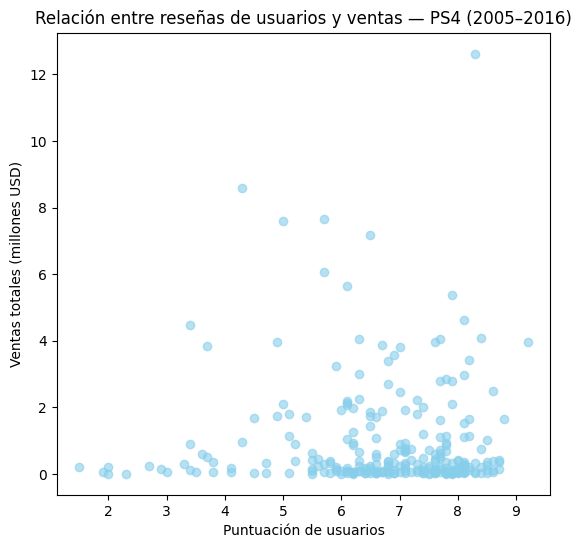

In [45]:
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.scatter(df_ps4['user_score'], df_ps4['total_sales'], alpha=0.6, color='skyblue')
plt.title('Relación entre reseñas de usuarios y ventas — PS4 (2005–2016)')
plt.xlabel('Puntuación de usuarios')
plt.ylabel('Ventas totales (millones USD)')

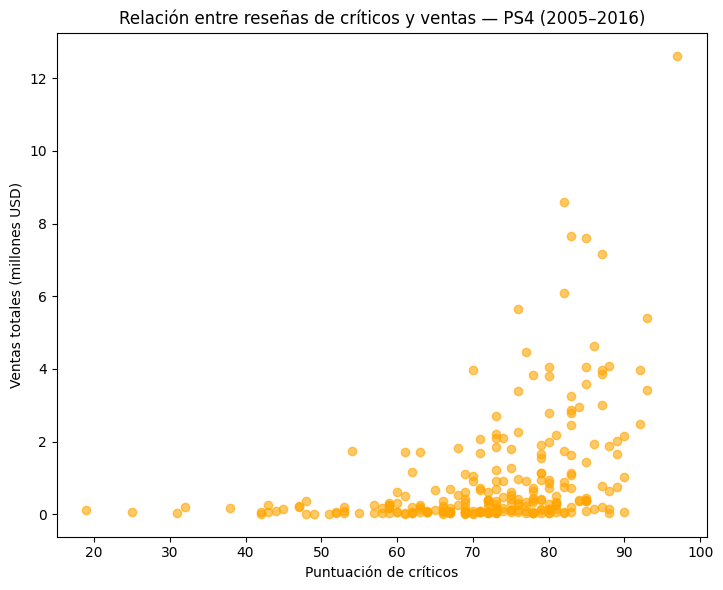

In [46]:
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 2)
plt.scatter(df_ps4['critic_score'], df_ps4['total_sales'], alpha=0.6, color='orange')
plt.title('Relación entre reseñas de críticos y ventas — PS4 (2005–2016)')
plt.xlabel('Puntuación de críticos')
plt.ylabel('Ventas totales (millones USD)')
plt.tight_layout()

**4. Distribución de Juegos por Género (Datos de 2013-2016):**

La distribución general de ventas por género en el período 2013-2016 revela que los géneros de **Acción, Shooter y Sports** son los más rentables en términos de ventas totales. Estos géneros consistentemente generan las mayores ventas, lo que indica una fuerte demanda por este tipo de juegos. Los géneros como Adventure y Strategy tienden a tener ventas totales más bajas en comparación.

Aquí se muestra la distribución de ventas totales por género (2013-2016):

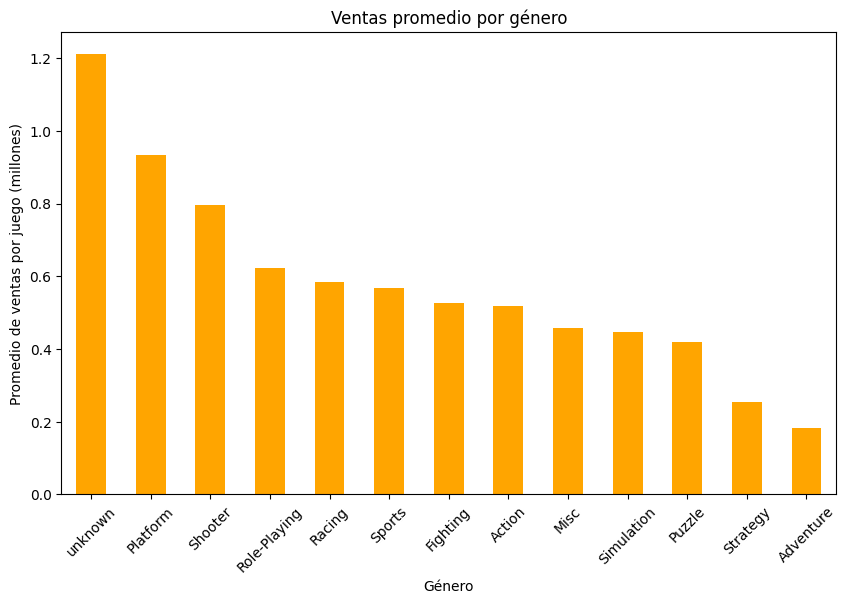

In [47]:
avg_genre_sales = df.groupby('genre')['total_sales'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
avg_genre_sales.plot(kind='bar', color='orange')
plt.title('Ventas promedio por género')
plt.ylabel('Promedio de ventas por juego (millones)')
plt.xlabel('Género')
plt.xticks(rotation=45)
plt.show()

**5. Perfil de Usuario por Región (Datos de 2013-2016):**

Analicé las diferencias en las preferencias de plataformas, géneros y el impacto de las clasificaciones ESRB en tres regiones clave: Norteamérica (NA), Europa (UE) y Japón (JP), utilizando datos de 2013-2016.

*   **Plataformas Principales:** Las plataformas más populares varían significativamente en el período 2013-2016. NA muestra una fuerte preferencia por **PS4, XOne y X360**, UE por PS4, PS3 y XOne, y JP por 3DS, PS3 y PSV. Las plataformas de Sony (PS3, PS4, PSV) tienen una presencia más equilibrada globalmente en comparación con la especialización regional de Xbox (NA) y Nintendo (JP).
*   **Géneros Principales:** En el período 2013-2016, los géneros más vendidos globalmente fueron Acción, Shooter y Sports. Sus popularidad relativa puede variar regionalmente.
*   **Clasificaciones ESRB:** En el período 2013-2016, las clasificaciones 'M', 'E' y 'E10+' suelen generar las mayores ventas en NA y UE. En JP, la categoría 'unknown' domina las ventas (lo cual requiere precaución en la interpretación), seguida por 'T' y 'E'. Las clasificaciones 'M' tienen menos peso en JP en comparación con NA y UE.

**6. Pruebas de Hipótesis:**

Se realizó una prueba t de muestras independientes. Sin embargo, debido a valores faltantes en los datos de `user_score` para estas plataformas en el período considerado, la prueba no se pudo calcular correctamente (resultados `nan`). Según la lógica implementada (`if p_value < alpha`), al ser el p-value `nan` (no menor que 0.05), la hipótesis nula fue aceptada. Es crucial recordar que esta aceptación se debe a la imposibilidad de realizar el cálculo, no a una confirmación estadística de igualdad.

Hipótesis 2 (Action vs Sports User Scores):

Se realizó una prueba t de muestras independientes después de eliminar los valores faltantes de `user_score`. El test de Levene indicó varianzas desiguales, por lo que se usó la corrección de Welch. El valor p resultante (p = 0.000) fue menor que 0.05. Por lo tanto, la hipótesis nula fue rechazada, concluyendo que existe una diferencia significativa en las calificaciones promedio de los usuarios entre los juegos de Acción y Deportes en el período 2013-2016.

**Recomendaciones para 2017:**

Para planificar campañas publicitarias en 2017, la tienda online Ice debería

Enfocarse en plataformas en crecimiento como PS4 y XOne, además de mantener la atención en plataformas establecidas con ventas continuas dentro del período relevante.
Priorizar los géneros de Acción, Shooter y Sports en sus estrategias de marketing, adaptando el enfoque según las preferencias regionales identificadas.
Considerar la influencia de las reseñas de críticos, especialmente en regiones como NA y UE, al promocionar juegos.
Adaptar las campañas publicitarias a las preferencias de plataformas y géneros específicas de cada región (ej. Nintendo en JP, Xbox en NA, PlayStation en UE), basándose en los datos del período 2013-2016.
Tomar en cuenta las clasificaciones ESRB para dirigir la publicidad al público adecuado en cada región, prestando atención a la prevalencia de diferentes clasificaciones por región en el período relevante. Considerar la alta proporción de 'unknown' en JP como un área que requiere más investigación si es posible.

Este análisis, centrado en los datos más recientes y relevantes (2013-2016), proporciona una base sólida para la toma de decisiones estratégicas para el próximo año.